# LRDN Benchmark Plots

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import matplotlib
from matplotlib.backends.backend_pdf import PdfPages

sns.set_theme()

sns.set_theme(context='paper', style='ticks')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Load data

Run the Snakemake workflow to produce the following output file.

In [25]:
df = pd.read_table('data/output/results.tsv')

## Produce plots

We produce two plot that show the IRR count (the signal used by ExpansionHunter denovo to call repeat expansions) vs. the copy number of the repeat locus, before and after local read dpeth normalization.

In [26]:
pdf = PdfPages('data/output/lrdn_benchmakr_plots.pdf') 

In [27]:
df[['amp', 'glob_irr', 'local_irr', 'glob_avg_read_depth', 'local_avg_read_depth']].groupby('amp').agg('mean')
df['copy_num'] = df['amp'] + 2
df = df[~df['copy_num'].isin([11, 12])]

### Global normalized

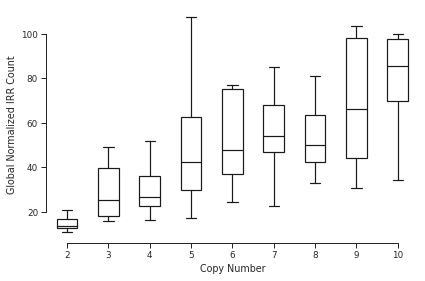

In [28]:
fig, ax = plt.subplots()
sns.boxplot(x='copy_num', y='glob_irr', data=df, ax=ax, showfliers=False, width=0.5)

ax.set_ylabel('Global Normalized IRR Count')
ax.set_xlabel('Copy Number')

plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

sns.despine(offset=0, trim=True)

plt.tight_layout()

pdf.savefig(transparent=True)

### Local normalized

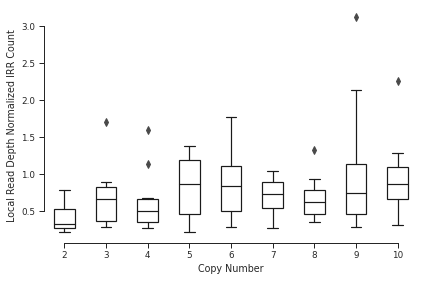

In [29]:
fig, ax = plt.subplots()
sns.boxplot(x='copy_num', y='local_irr', data=df, ax=ax, showfliers=True, width=0.5)

ax.set_ylabel('Local Read Depth Normalized IRR Count')
ax.set_xlabel('Copy Number')

plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax.lines, color='k')

sns.despine(offset=0, trim=True)

plt.tight_layout()

pdf.savefig(transparent=True)

In [30]:
pdf.close()